In [ ]:
# AI & Deep Learning-Transfer learning

1.Build an image classification using  transfer learning(VGG19)on CIFAR 10 data set(keras package).
2.Build an image classification using  transfer learning on horses or human dataset.
Data Set:https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset

What Kind Of Approach You Could Follow for your Problem Statements :

Reading the Data, Understanding the Data, Exploratory Data Analysis, Splitting the Data, Training and Testing, Modeling, Accuracy

Hints provided are only for your references or getting started. You’re free to use your own methodology to work on your assignments.


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [2]:
# Download and extract dataset from Kaggle
!pip install kaggle
from google.colab import files
files.upload() # Upload kaggle.json file here

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shah1111","key":"40110658890d20f20a4d07775b8cc4e5"}'}

In [5]:
# Download the dataset
!kaggle datasets download -d sanikamal/horses-or-humans-dataset

Dataset URL: https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset
License(s): other
 94% 289M/307M [00:03<00:00, 108MB/s] 
100% 307M/307M [00:03<00:00, 86.1MB/s]


In [6]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 2s 0us/step


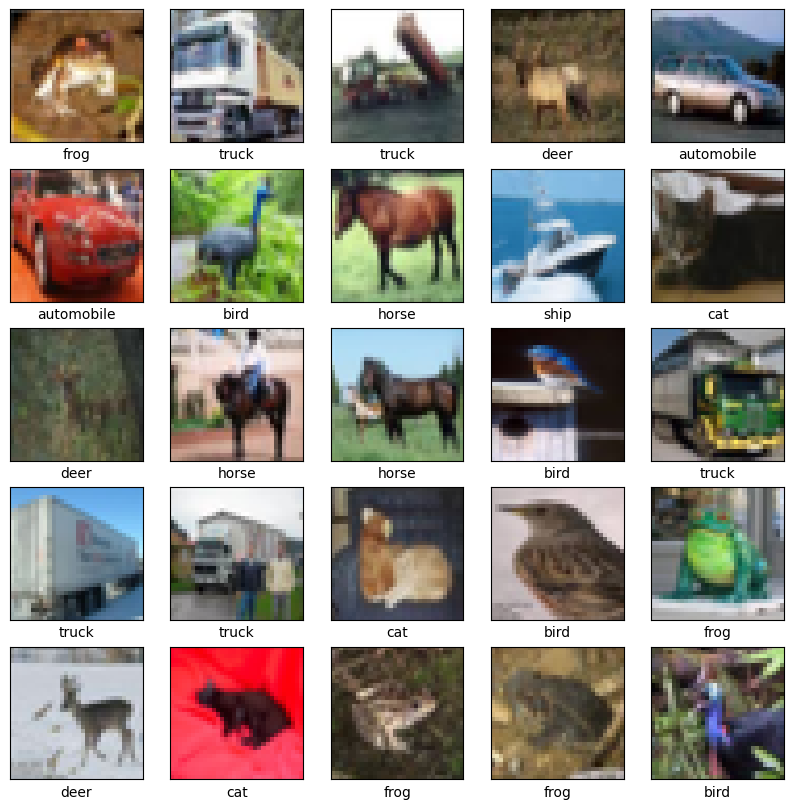

In [7]:
# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display sample images from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()


In [8]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Check class distribution
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(class_names, counts)))

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
{'airplane': 5000, 'automobile': 5000, 'bird': 5000, 'cat': 5000, 'deer': 5000, 'dog': 5000, 'frog': 5000, 'horse': 5000, 'ship': 5000, 'truck': 5000}


In [9]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [10]:
# Load the VGG19 model without the top layers
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze all the layers
for layer in vgg19.layers:
    layer.trainable = False

# Create the model
model = Sequential([
    vgg19,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Display the model summary
model.summary()


80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 20292170 (77.41 MB)
Trainable params: 267786 (1.02 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [11]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")


Epoch 1/5
1250/1250 [==============================] - 22s 13ms/step - loss: 1.3984 - accuracy: 0.5074 - val_loss: 1.2789 - val_accuracy: 0.5432
Epoch 2/5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.2250 - accuracy: 0.5685 - val_loss: 1.2204 - val_accuracy: 0.5678
Epoch 3/5
1250/1250 [==============================] - 15s 12ms/step - loss: 1.1548 - accuracy: 0.5931 - val_loss: 1.1939 - val_accuracy: 0.5770
Epoch 4/5
1250/1250 [==============================] - 17s 14ms/step - loss: 1.1067 - accuracy: 0.6088 - val_loss: 1.1876 - val_accuracy: 0.5833
Epoch 5/5
1250/1250 [==============================] - 20s 16ms/step - loss: 1.0568 - accuracy: 0.6275 - val_loss: 1.1548 - val_accuracy: 0.5922
313/313 - 3s - loss: 1.1650 - accuracy: 0.5895 - 3s/epoch - 10ms/step

Test accuracy: 0.5895000100135803


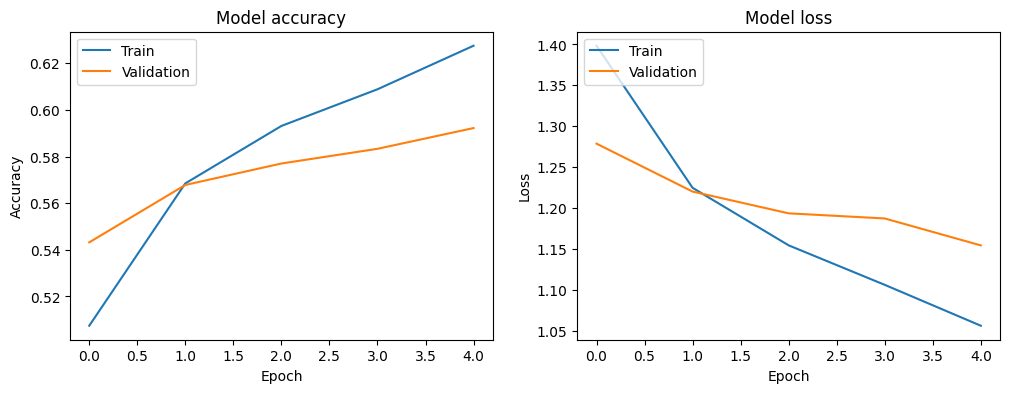

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [13]:
# Extract the dataset
with zipfile.ZipFile('horses-or-humans-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('horses_or_humans')

In [15]:
# Check the content of the main directory
data_dir = 'horses_or_humans'
print(os.listdir(data_dir))

['horse-or-human']


In [17]:
# Ensure the data directories exist
horses_dir = os.path.join(data_dir, 'horse-or-human')
humans_dir = os.path.join(data_dir, 'horse-or-human')

if not os.path.exists(horses_dir) or not os.path.exists(humans_dir):
    raise FileNotFoundError(f"Directory not found. Please check the directory structure in '{data_dir}'.")

# Count the number of images in each category
num_horses = len(os.listdir(horses_dir))
num_humans = len(os.listdir(humans_dir))
print(f"Number of horse images: {num_horses}")
print(f"Number of human images: {num_humans}")


Number of horse images: 3
Number of human images: 3


In [18]:
# Data generators for loading and augmenting images
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training and validation generators
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 2053 images belonging to 1 classes.
Found 513 images belonging to 1 classes.


In [19]:
# Load the VGG19 model without the top layers
vgg19_horses_humans = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all the layers
for layer in vgg19_horses_humans.layers:
    layer.trainable = False

# Create the model
model_horses_humans = Sequential([
    vgg19_horses_humans,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_horses_humans.compile(optimizer=Adam(),
                            loss='binary_crossentropy',
                            metrics=['accuracy'])

# Display the model summary
model_horses_humans.summary()

# Train the model
history_horses_humans = model_horses_humans.fit(train_generator, epochs=10, validation_data=validation_generator)

# Evaluate the model
val_loss, val_acc = model_horses_humans.evaluate(validation_generator, verbose=2)
print(f"\nValidation accuracy: {val_acc}")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               12845568  
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 32870465 (125.39 MB)
Trainable params: 12846081 (49.00 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________
Epoch 1/10
65/65 [==============================] - 28s 297ms/step - loss: 0.0099 - accuracy: 0.9942 - val_loss: 0.0000e+00 - val_accurac

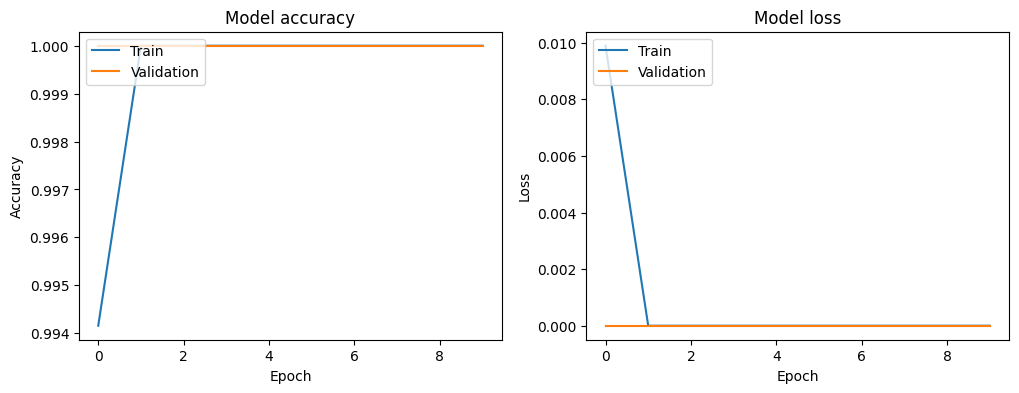

In [20]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_horses_humans.history['accuracy'])
plt.plot(history_horses_humans.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_horses_humans.history['loss'])
plt.plot(history_horses_humans.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
